In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('/telur.csv')

In [3]:
data

,Kabupaten/Kota,Produksi Telur Ayam Kampung,Produksi Telur Itik
0,Buton,246605,87865
1,Muna,1097567,98987
2,Konawe,1280660,1038542
3,Kolaka,1228091,229717
4,Konawe Selatan,925962,279445
5,Bombana,35738,11969
6,Wakatobi,69527,54602
7,Kolaka Utara,570950,1784388
8,Buton Utara,60997,18601
9,Konawe Utara,103743,6414


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Kabupaten/Kota               18 non-null     object
 1   Produksi Telur Ayam Kampung  18 non-null     int64 
 2   Produksi Telur Itik          18 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
data = data.set_index('Kabupaten/Kota')
data.head()

,Produksi Telur Ayam Kampung,Produksi Telur Itik
Kabupaten/Kota,,
Buton,246605,87865
Muna,1097567,98987
Konawe,1280660,1038542
Kolaka,1228091,229717
Konawe Selatan,925962,279445


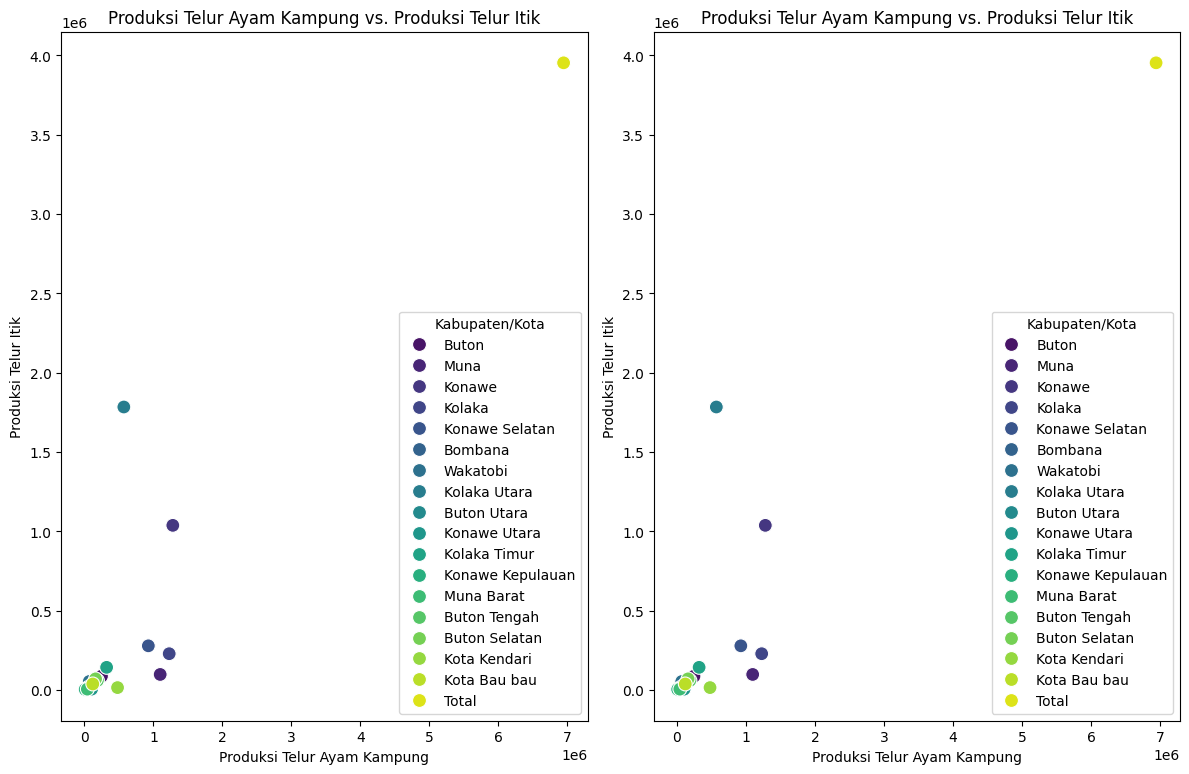

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Produksi Telur Ayam Kampung', y='Produksi Telur Itik', hue='Kabupaten/Kota', data=data, palette='viridis', s=100)
plt.title('Produksi Telur Ayam Kampung vs. Produksi Telur Itik')
plt.xlabel('Produksi Telur Ayam Kampung')
plt.ylabel('Produksi Telur Itik')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Produksi Telur Ayam Kampung', y='Produksi Telur Itik', hue='Kabupaten/Kota', data=data, palette='viridis', s=100)
plt.title('Produksi Telur Ayam Kampung vs. Produksi Telur Itik')
plt.xlabel('Produksi Telur Ayam Kampung')
plt.ylabel('Produksi Telur Itik')

plt.tight_layout()
plt.show()

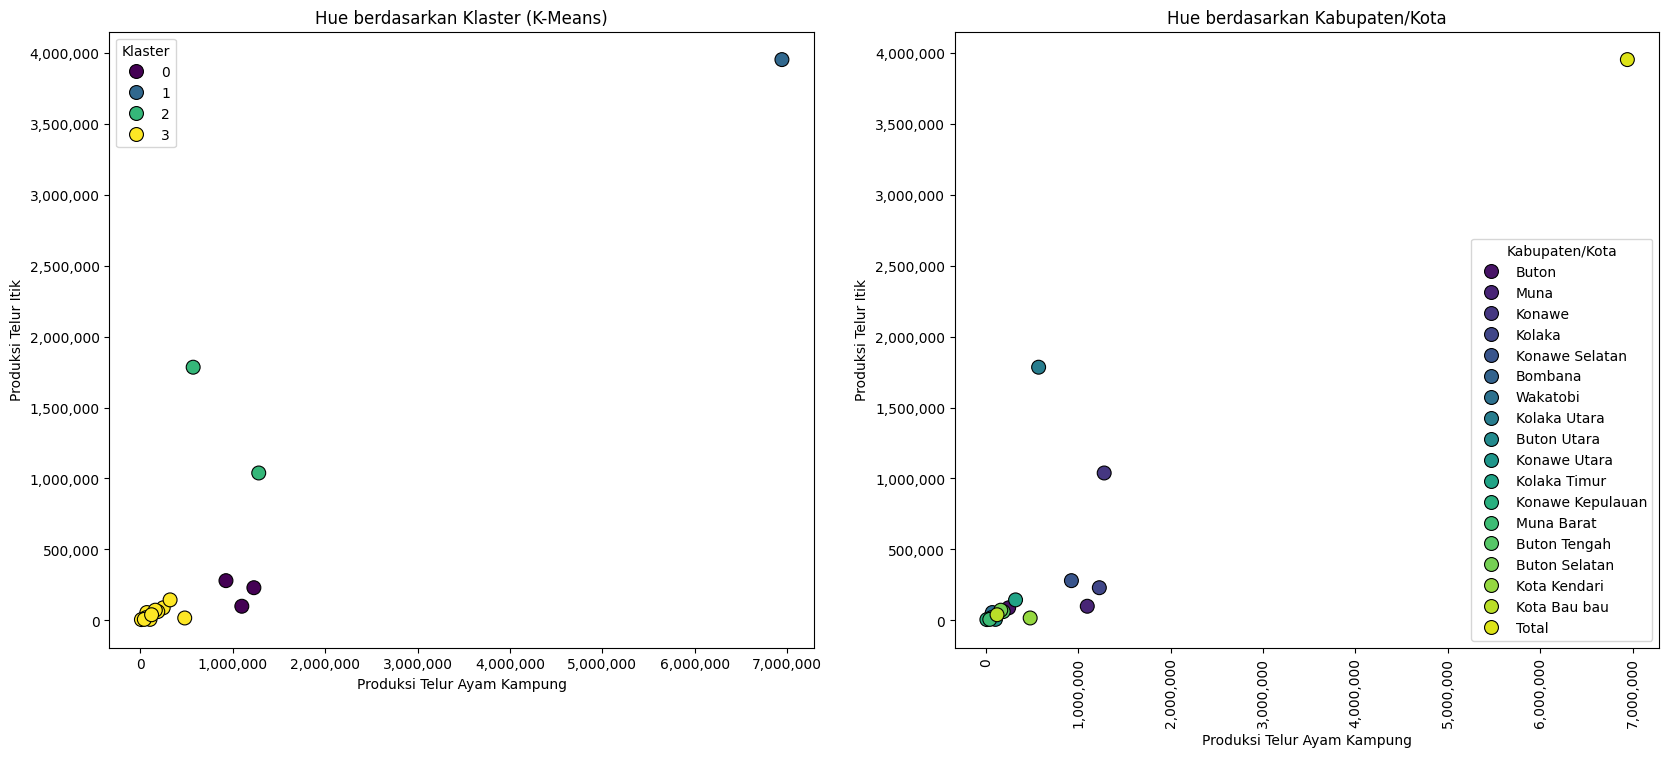

In [7]:
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=0)

data['Klaster'] = kmeans_model.fit_predict(data[['Produksi Telur Ayam Kampung', 'Produksi Telur Itik']])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))

sns.scatterplot(x='Produksi Telur Ayam Kampung', y='Produksi Telur Itik', hue='Klaster', data=data, palette='viridis', edgecolor='k', s=100, ax=axes[0])
axes[0].set_title('Hue berdasarkan Klaster (K-Means)')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].yaxis.set_major_formatter(formatter)

sns.scatterplot(x='Produksi Telur Ayam Kampung', y='Produksi Telur Itik', hue=data.index, data=data, palette='viridis', edgecolor='k', s=100, ax=axes[1])
axes[1].set_title('Hue berdasarkan Kabupaten/Kota')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)
plt.show()

In [8]:
print("Hasil Klasterisasi K-Means:")
print(data[['Produksi Telur Ayam Kampung', 'Produksi Telur Itik', 'Klaster']])

klaster_statistik = data.groupby('Klaster')[['Produksi Telur Ayam Kampung', 'Produksi Telur Itik']].mean()
print("\nStatistik Klaster:")
print(klaster_statistik)

Hasil Klasterisasi K-Means:
                  Produksi Telur Ayam Kampung  Produksi Telur Itik  Klaster
Kabupaten/Kota                                                             
Buton                                  246605                87865        3
Muna                                  1097567                98987        0
Konawe                                1280660              1038542        2
Kolaka                                1228091               229717        0
Konawe Selatan                         925962               279445        0
Bombana                                 35738                11969        3
Wakatobi                                69527                54602        3
Kolaka Utara                           570950              1784388        2
Buton Utara                             60997                18601        3
Konawe Utara                           103743                 6414        3
Kolaka Timur                           321236               

In [10]:
data['Klaster'] = kmeans_model.fit_predict(data[['Produksi Telur Ayam Kampung', 'Produksi Telur Itik']])
data['KabKota'] = data.index

fig = px.scatter(data, x='Produksi Telur Ayam Kampung', y='Produksi Telur Itik', color='Klaster', title='Scatter Plot Klaster (K-Means)', hover_data=['KabKota'])
fig.update_xaxes(tickformat=",")
fig.update_yaxes(tickformat=",")
fig.update_layout(showlegend=True)

fig.show()

In [11]:
calinski_harabasz_index = calinski_harabasz_score(data[['Produksi Telur Ayam Kampung', 'Produksi Telur Itik']], data['Klaster'])
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 336.18044427901594


Calinski-Harabasz Index:

Mengukur kualitas dan kepadatan klaster.
Semakin tinggi nilai Calinski-Harabasz Index, semakin baik klaster tersebut.
Index ini memperhitungkan rasio antara dispersi dalam kelompok dan dispersi antar kelompok.